# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 2.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
178197,0.3467,0.0586,0.0317,0.1587,0.1392,0.0073,0.0952,0.4053,0.1587,0.3613,3,3,10,10
334104,0.5566,0.5127,0.0610,0.0024,0.0024,0.0024,0.0024,0.3979,0.1123,0.1855,5,5,10,10
289566,0.5127,0.0586,0.0049,0.0024,0.0024,0.0024,0.0439,0.6812,0.0317,0.4590,9,9,5,5
302541,0.1294,0.3296,0.0146,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.1123,0,0,0,0
266208,1.1230,1.2793,0.6738,0.5127,0.2686,0.0513,0.1782,1.2915,0.2734,0.8350,5,5,3,3


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472501 entries, 0 to 472500
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          472501 non-null  float64
 1   Emg2          472501 non-null  float64
 2   Emg3          472501 non-null  float64
 3   Emg4          472501 non-null  float64
 4   Emg5          472501 non-null  float64
 5   Emg6          472501 non-null  float64
 6   Emg7          472501 non-null  float64
 7   Emg8          472501 non-null  float64
 8   Emg9          472501 non-null  float64
 9   Emg10         472501 non-null  float64
 10  repetition    472501 non-null  int64  
 11  rerepetition  472501 non-null  int64  
 12  stimulus      472501 non-null  int64  
 13  restimulus    472501 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.5 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000
mean,0.449598,0.369994,0.165067,0.110990,0.056133,0.014915,0.042496,0.302602,0.260029,0.219605,3.124415,2.194270,5.539897,3.961033
std,0.549594,0.394968,0.285421,0.240335,0.265131,0.047967,0.110609,0.505100,0.485920,0.424508,3.479845,3.242834,6.570169,6.186865
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.100100,0.114700,0.004900,0.002400,0.002400,0.002400,0.002400,0.014600,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.234400,0.263700,0.043900,0.002400,0.002400,0.002400,0.002400,0.095200,0.002400,0.063500,2.000000,0.000000,3.000000,0.000000
75%,0.590800,0.502900,0.192900,0.092800,0.009800,0.002400,0.024400,0.371100,0.324700,0.244100,6.000000,4.000000,10.000000,7.000000
max,4.665500,4.663100,3.886700,3.313000,4.663100,1.196300,1.621100,4.665500,4.663100,4.663100,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     204101
8      15513
2      15511
7      15508
12     15504
4      15495
5      15490
6      15478
11     15473
9      15471
10     15448
3      15445
1      15427
17     10345
14     10345
13     10341
15     10313
16     10282
21      5194
19      5185
20      5178
18      5176
22      5151
23      5127
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.813756,-0.710291,-0.611593,-0.504274,-0.223238,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
1,-0.813756,-0.768316,-0.611593,-0.504274,-0.223238,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
2,-0.805569,-0.808981,-0.611593,-0.504274,-0.223238,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
3,-0.809662,-0.855353,-0.611593,-0.504274,-0.223238,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
4,-0.809662,-0.884366,-0.611593,-0.504274,-0.214670,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
...,...,...,...,...,...,...,...,...,...,...
386608,-0.614017,-0.007807,-0.524071,-0.504274,-0.223238,-0.289385,-0.39416,-0.619390,-0.584607,-0.538362
386609,-0.622204,-0.042527,-0.540014,-0.504274,-0.223238,-0.289385,-0.39416,-0.623994,-0.584607,-0.538362
386610,-0.609752,-0.007807,-0.547822,-0.494660,-0.223238,-0.289385,-0.39416,-0.619390,-0.584607,-0.538362
386611,-0.626468,-0.077484,-0.571899,-0.504274,-0.223238,-0.289385,-0.39416,-0.619390,-0.584607,-0.538362


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
77/77 [==============================] - 8s 29ms/step - loss: 1.3018 - accuracy: 0.6507 - val_loss: 0.9304 - val_accuracy: 0.7310
Epoch 2/300
77/77 [==============================] - 2s 25ms/step - loss: 0.8317 - accuracy: 0.7592 - val_loss: 0.7524 - val_accuracy: 0.7813
Epoch 3/300
77/77 [==============================] - 2s 25ms/step - loss: 0.7170 - accuracy: 0.7904 - val_loss: 0.6825 - val_accuracy: 0.7995
Epoch 4/300
77/77 [==============================] - 2s 25ms/step - loss: 0.6468 - accuracy: 0.8088 - val_loss: 0.6295 - val_accuracy: 0.8110
Epoch 5/300
77/77 [==============================] - 2s 25ms/step - loss: 0.5958 - accuracy: 0.8232 - val_loss: 0.5716 - val_accuracy: 0.8298
Epoch 6/300
77/77 [==============================] - 2s 26ms/step - loss: 0.5556 - accuracy: 0.8345 - val_loss: 0.5452 - val_accuracy: 0.8357
Epoch 7/300
77/77 [==============================] - 2s 25ms/step - loss: 0.5230 - accuracy: 0.8434 - val_loss: 0.5006 - val_accuracy: 0.8487
Epoch 

77/77 [==============================] - 2s 26ms/step - loss: 0.1602 - accuracy: 0.9499 - val_loss: 0.2053 - val_accuracy: 0.9384
Epoch 59/300
77/77 [==============================] - 2s 26ms/step - loss: 0.1564 - accuracy: 0.9515 - val_loss: 0.1920 - val_accuracy: 0.9414
Epoch 60/300
77/77 [==============================] - 2s 25ms/step - loss: 0.1532 - accuracy: 0.9525 - val_loss: 0.1944 - val_accuracy: 0.9414
Epoch 61/300
77/77 [==============================] - 2s 26ms/step - loss: 0.1522 - accuracy: 0.9524 - val_loss: 0.1974 - val_accuracy: 0.9403
Epoch 62/300
77/77 [==============================] - 2s 26ms/step - loss: 0.1508 - accuracy: 0.9529 - val_loss: 0.2017 - val_accuracy: 0.9382
Epoch 63/300
77/77 [==============================] - 2s 26ms/step - loss: 0.1524 - accuracy: 0.9522 - val_loss: 0.1918 - val_accuracy: 0.9429
Epoch 64/300
77/77 [==============================] - 2s 26ms/step - loss: 0.1515 - accuracy: 0.9529 - val_loss: 0.1904 - val_accuracy: 0.9427
Epoch 65/300

77/77 [==============================] - 2s 27ms/step - loss: 0.1013 - accuracy: 0.9681 - val_loss: 0.1618 - val_accuracy: 0.9533
Epoch 116/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0992 - accuracy: 0.9688 - val_loss: 0.1636 - val_accuracy: 0.9536
Epoch 117/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0973 - accuracy: 0.9696 - val_loss: 0.1555 - val_accuracy: 0.9550
Epoch 118/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0954 - accuracy: 0.9700 - val_loss: 0.1735 - val_accuracy: 0.9503
Epoch 119/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0975 - accuracy: 0.9692 - val_loss: 0.1606 - val_accuracy: 0.9538
Epoch 120/300
77/77 [==============================] - 2s 26ms/step - loss: 0.1001 - accuracy: 0.9687 - val_loss: 0.1590 - val_accuracy: 0.9548
Epoch 121/300
77/77 [==============================] - 2s 27ms/step - loss: 0.0954 - accuracy: 0.9699 - val_loss: 0.1605 - val_accuracy: 0.9547
Epoch 

Epoch 172/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0746 - accuracy: 0.9763 - val_loss: 0.1499 - val_accuracy: 0.9600
Epoch 173/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0776 - accuracy: 0.9757 - val_loss: 0.1531 - val_accuracy: 0.9586
Epoch 174/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0733 - accuracy: 0.9771 - val_loss: 0.1472 - val_accuracy: 0.9599
Epoch 175/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0695 - accuracy: 0.9781 - val_loss: 0.1541 - val_accuracy: 0.9598
Epoch 176/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0735 - accuracy: 0.9769 - val_loss: 0.1480 - val_accuracy: 0.9607
Epoch 177/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0698 - accuracy: 0.9781 - val_loss: 0.1565 - val_accuracy: 0.9597
Epoch 178/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0704 - accuracy: 0.9779 - val_loss: 0.1421 - val_accuracy:

Epoch 229/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0616 - accuracy: 0.9810 - val_loss: 0.1562 - val_accuracy: 0.9621
Epoch 230/300
77/77 [==============================] - 2s 27ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.1489 - val_accuracy: 0.9622
Epoch 231/300
77/77 [==============================] - 2s 27ms/step - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.1490 - val_accuracy: 0.9624
Epoch 232/300
77/77 [==============================] - 2s 27ms/step - loss: 0.0581 - accuracy: 0.9820 - val_loss: 0.1544 - val_accuracy: 0.9633
Epoch 233/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0686 - accuracy: 0.9788 - val_loss: 0.1581 - val_accuracy: 0.9605
Epoch 234/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0635 - accuracy: 0.9802 - val_loss: 0.1464 - val_accuracy: 0.9627
Epoch 235/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0599 - accuracy: 0.9811 - val_loss: 0.1515 - val_accuracy:

Epoch 286/300
77/77 [==============================] - 2s 27ms/step - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.1591 - val_accuracy: 0.9641
Epoch 287/300
77/77 [==============================] - 2s 27ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.1580 - val_accuracy: 0.9634
Epoch 288/300
77/77 [==============================] - 2s 27ms/step - loss: 0.0517 - accuracy: 0.9838 - val_loss: 0.1519 - val_accuracy: 0.9648
Epoch 289/300
77/77 [==============================] - 2s 28ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.1629 - val_accuracy: 0.9631
Epoch 290/300
77/77 [==============================] - 2s 27ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.1522 - val_accuracy: 0.9644
Epoch 291/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.1548 - val_accuracy: 0.9641
Epoch 292/300
77/77 [==============================] - 2s 26ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.1517 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

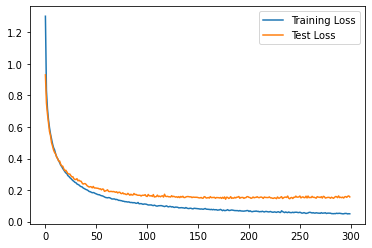

In [24]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

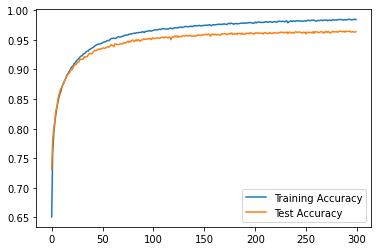

In [25]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)

2417/2417 [==============================] - 5s 2ms/step - loss: 0.1565 - accuracy: 0.9639


##  4.3 Make Predictions

In [27]:
predictions = model.predict(X_test)

In [28]:
predictions

array([[7.6192649e-13, 9.9989617e-01, 3.6859561e-12, ..., 4.0685706e-17,
        4.4175780e-14, 6.0868338e-16],
       [9.8522830e-01, 7.4109573e-07, 8.5230880e-09, ..., 1.2917138e-10,
        1.2215824e-11, 5.4466615e-11],
       [9.9999678e-01, 4.0495008e-13, 6.2584064e-08, ..., 2.6750822e-20,
        1.1732168e-10, 2.3758113e-28],
       ...,
       [9.9818891e-01, 1.3291025e-06, 2.6117499e-09, ..., 6.7359075e-08,
        2.3391276e-12, 3.5606362e-10],
       [1.3497018e-24, 9.0658697e-23, 1.2807333e-29, ..., 0.0000000e+00,
        4.9481687e-38, 6.3548458e-27],
       [9.6245849e-01, 4.3541090e-07, 4.4273690e-07, ..., 1.2600985e-09,
        2.4723819e-09, 1.7900362e-12]], dtype=float32)